# IBARG Computational Team Screening Test

## Instructions

- You are encouraged to "cheat" during this screening test. That is, please use google and documentations as much as possible to learn about the modules you are about to use. 

- You are free to use any code snippets from some online source, but it is MANDATORY to mention the source and cite the author in the code using comments. 

- Make sure you understand the code snippets you are copying as it will help you in the future tasks. 

- You can submit your entries by creating a GitHub repository and making a ReadMe file for all the plots and diagrams.

- Please add comments in your code to make us aware of your thinking process and what is being done. 

- This is supposed to be a screening cum learning task, hence if you feel stuck anywhere or feel lost, please feel free to contact your peers or me. 

- You can do this assignment in Jupyter Notebook on your device, or in Google Colab. 

- If you are using Google Colab, please learn how to "Mount your Google Drive" in order to access data directly from the Google Colab. 


- **Submission Deadline: 20th Feb 2023, 2359 IST**

## Tasks

In this assignment, you will be dealing with three different computational astronomy approaches:

#### 1. Data Visualization

For this part, you will be using the Gaia data of the stars contained in a spherical volume around the center of our galaxy to visualize and quantify their motion using computational approach to extract the "Physics" from the data.

#### 2. Data Cleaning and Extraction
Here, you will be given rather "dirty" FITS file, along with the bias and flats. You are supposed to perform the appropriate cleaning steps and produce a science image.

#### 3. Data Interpretation

For this part you will be given a free will to query the data of your choice form any data release of any telescope and present an intuitive visualization and an interpretation of the "visualized data".

# 1. Data Visualization

The Gaia Telescope, since its launch has produced precise measurements about a billion stars and other source in our milky way and outside. This has lead to the creation of one of the most comprehensive and dynamic 3D maps of the Milky way till date. 

Here the dataset is contained in a `CSV` file named `SphereData.csv`. It contains all the parameters of the stars in the central region of the milky way around our supermassive black hole. Sagittarius A*.

You are supposed to read this data into a workable dataset using any Data base management library of your choice such as `pandas`, `numpy` etc, and create visually revealing plots and diagrams which would help us know something about the stars.

###  Tasks

- Create RA and DEC distribution of the data.
- Create a distance distribution and comment whether these stars "actually" lie around the galactic center. Discard any stars which do not seem to fit the norm. 
- Make Density scatter plots of the Proper motion in RA and DEC

### Other 

There are several parameters provided for each star in the dataset. So if you wish to make plots between some other values such as "Radial velocity" versus "distance" or "Magnitude" v/s "Position" etc, you are free to do so. Make as many plots as you find interesting and write a few lines about what the plot "demonstrates" or what science is contained in those plots.

In [ ]:
!pip install astroquery


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
######################################################################################
# -- THIS IS THE DATA QUERY WHICH WAS SENT TO GAIA SERVER TO ACQUIRE THE SPHERE DATA. CSV
######################################################################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import ascii, fits
import astropy.units as u
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord
from scipy import stats
import sklearn
import seaborn as sns
import matplotlib.cm as cm
from scipy.ndimage import gaussian_filter
from scipy.stats import gaussian_kde
import math

#Coordinates of the Galactic Center
c = SkyCoord('17h45m40.04s', '-29d00m28.1s', frame='icrs')

#RA and DECof the Galactic Center
c_ra = 266.41683333
c_dec = -29.00780556

#Radius of Selection in Parsecs
r_s = 300
width = np.degrees(np.arctan(r_s / 8000))
print('The required width of window is: ', round(2 * width, 3), "degrees")

a1 = round(c_ra + width,3)
a2 = round(c_ra - width,3)
b1 = round(c_dec + width,3)
b2 = round(c_dec - width,3)
print(f'\nThe required RA values are: {a2} and {a1}')
print(f'The required DEC values are: {b2} and {b1}')

c1 = round(1000/(8000+r_s),4)
c2 = round(1000/(8000-r_s),4)
print(f'\nThe required parallax window is: {c1} and {c2}')

query = f'''select g.source_id, g.ra, g.ra_error, g.dec, g.dec_error, g.parallax,g.parallax_over_error,g.bp_rp,
g.pm,g.pmra,g.pmra_error,g.pmdec,g.pmdec_error,g.phot_g_mean_mag,g.phot_bp_mean_mag,g.phot_rp_mean_mag,g.radial_velocity,
h.classprob_dsc_combmod_star + h.classprob_dsc_combmod_whitedwarf + h.classprob_dsc_combmod_binarystar as comb
from gaiadr3.gaia_source as g, gaiadr3.astrophysical_parameters as h 
where g.source_id = h.source_id and
g.ra between {a2} and {a1} and
g.dec between {b2} and {b1} and
g.parallax between {c1} and {c2}
order by g.phot_g_mean_mag desc, comb desc'''


job = Gaia.launch_job_async(query)
r = job.get_results()

print('\nTotal number of stars queried: ',len(r))

The required width of window is:  4.295 degrees

The required RA values are: 264.269 and 268.564
The required DEC values are: -31.155 and -26.86

The required parallax window is: 0.1205 and 0.1299


INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]

Total number of stars queried:  29551


In [ ]:
# Import all the required modules and libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Import the Sphere.csv dataset here
from google.colab import drive
drive.mount("/content/gdrive")
dataset = "/content/gdrive/MyDrive/RG_Assignment/SphereData.csv"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Reading the csv file and making a datafreme using Pandas.
df = pd.read_csv(dataset, sep=',')
df.head()

,Unnamed: 0,source_id,ra,ra_error,dec,dec_error,parallax,parallax_over_error,bp_rp,pm,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,radial_velocity,comb
0,0,4056086781454203648,268.453925,0.106524,-30.846557,0.090109,0.124419,1.153919,NaN,4.067288,-1.132847,0.133845,-3.906340,0.091316,NaN,NaN,NaN,NaN,NaN
1,1,4057323529992762368,267.950321,0.136201,-29.198784,0.114774,0.125602,0.787692,NaN,10.326191,-5.462175,0.153988,-8.763268,0.111587,NaN,NaN,15.703587,NaN,1.0
2,2,4060986239454576512,265.651017,0.122662,-27.074060,0.097517,0.121898,0.809606,NaN,8.376596,-5.696467,0.143801,-6.141467,0.092029,NaN,NaN,14.741826,NaN,1.0
3,3,4057382010307715456,268.004722,1.373218,-28.525432,1.044462,0.126923,0.138851,NaN,4.383009,-3.854409,1.099409,-2.086697,0.856380,NaN,NaN,17.799229,NaN,1.0
4,4,4057733166811672448,267.014180,1.023097,-27.530267,0.857838,0.121109,0.132910,NaN,2.115104,2.074851,1.369168,-0.410678,0.848580,NaN,NaN,18.667568,NaN,1.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'source_id', 'ra', 'ra_error', 'dec', 'dec_error',
       'parallax', 'parallax_over_error', 'bp_rp', 'pm', 'pmra', 'pmra_error',
       'pmdec', 'pmdec_error', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'radial_velocity', 'comb'],
      dtype='object')

### RA v/s DEC distribution

Text(0.5, 1.0, 'DEC Distribution')

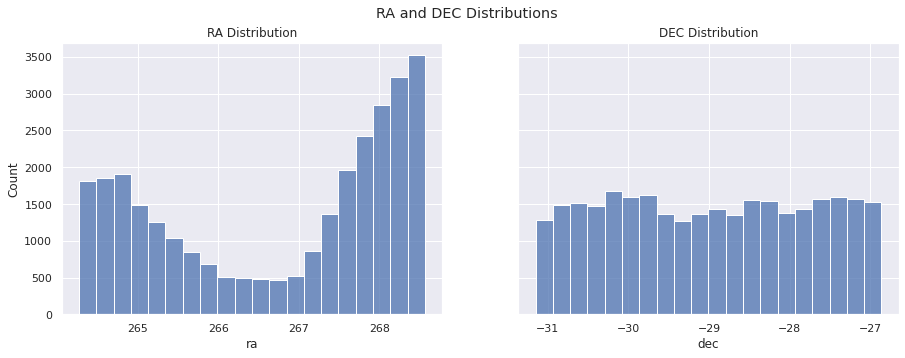

In [ ]:
#Checking how the distributions of RA and DEC look individually
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('RA and DEC Distributions')

# RA Distribution
sns.histplot(df['ra'], ax=axes[0], kde = False,bins = 20)
axes[0].set_title('RA Distribution')

# DEC Distribution
sns.histplot(df['dec'],ax=axes[1],bins=20, kde =False)
axes[1].set_title('DEC Distribution')



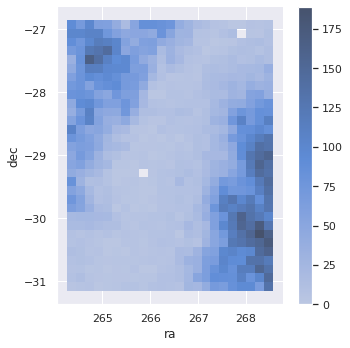

In [ ]:
#Plotting a bivariate distribution to understand the number of objects as a function of both RA and DEC.
sns.set_theme()
sns.displot(df, x="ra", y="dec",cbar=True )

By plotting the distribution of RA and DEC, we can observe that the number of objects are more or less evenly spread out across the declination but we see a sharp dip in the number of objects in the Galaxy center region in the plot across RA.

Similar trend is observed in the bivariate distribution of RA and DEC where we see that there is a sharp dip in the number of objects near the coordinates of the Galaxy center.

### Distance Distribution

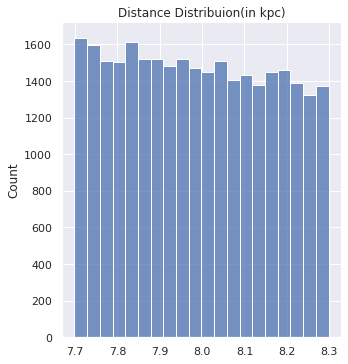

In [93]:
#Finding diatance of each object using the parallax angle.
distance = []
for i in range(len(df["parallax"])):
  distance.append(1/float(df.at[i,"parallax"]))

import seaborn as sns
sns.set_theme()
sns.displot(distance , kde = False,bins = 20 ).set(title = "Distance Distribuion(in kpc)")

All the stars queried are at a distance of 7.7 to 8.3 kpc . As the center of galaxy is at a distance of nearly 8 kpc from earth and the queried window is only 300 parsecs wide, we can safely expect that all the stars are at the center of galaxy.

### Density Scatter Plot

Text(0.5, 1.0, 'Scatterplot of DEC vs Prper motion')

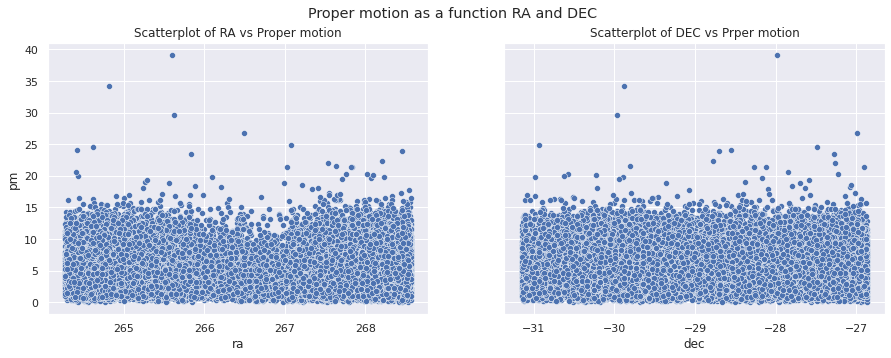

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Proper motion as a function RA and DEC')

# RA Distribution
sns.scatterplot(data = df, ax=axes[0], x ="ra", y ="pm")
axes[0].set_title('Scatterplot of RA vs Proper motion')

# DEC Distribution
sns.scatterplot(data = df,ax=axes[1],x = "dec", y="pm")
axes[1].set_title('Scatterplot of DEC vs Prper motion')



### Scatterplot of Parallax, Radial velocity and G band mean mag vs RA and DEC

Text(0.5, 1.0, 'Scatterplot of DEC vs Parallax ')

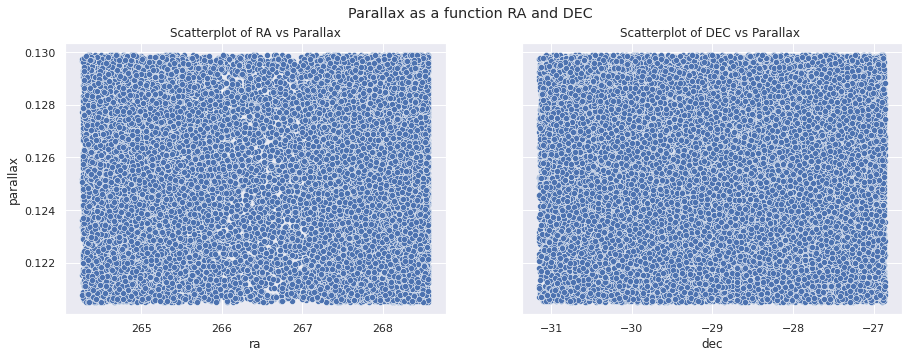

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Parallax as a function RA and DEC')

# RA Distribution
sns.scatterplot(data = df, ax=axes[0], x ="ra", y ="parallax")
axes[0].set_title('Scatterplot of RA vs Parallax')

# DEC Distribution
sns.scatterplot(data = df,ax=axes[1],x = "dec", y="parallax")
axes[1].set_title('Scatterplot of DEC vs Parallax ')

We can see that the parallax is in the range 0.122"-0.130" and does not follow and obvious trent with RA or DEC values. We is a less dense region near the ra values of galactic center(266 - 267 degrees) in the parallax vs RA plot. This in correspendece with the distribution of number of stars vs RA.

Text(0.5, 1.0, 'Scatterplot of DEC vs Radial Velocity')

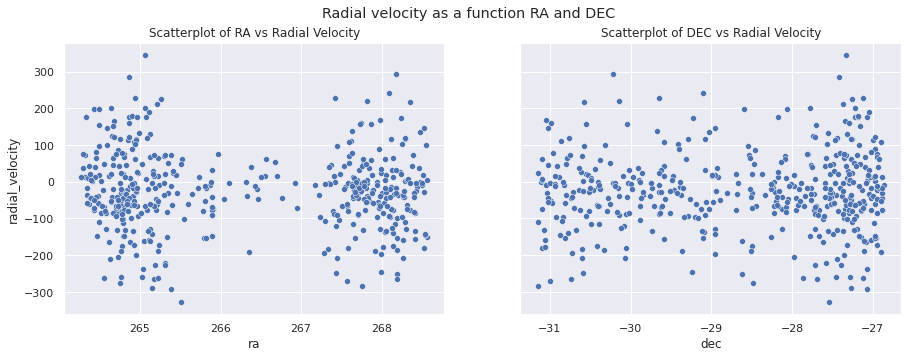

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Radial velocity as a function RA and DEC')

# RA Distribution
sns.scatterplot(data = df, ax=axes[0], x ="ra", y ="radial_velocity")
axes[0].set_title('Scatterplot of RA vs Radial Velocity')

# DEC Distribution
sns.scatterplot(data = df,ax=axes[1],x = "dec", y="radial_velocity")
axes[1].set_title('Scatterplot of DEC vs Radial Velocity')

The above plots of Radial velocity vs RA and DEC give us an idea about the trends of the radial velocity with ra and dec.  

* Along Dec there is not obvius trend being followed.
* Along RA we see that that, as we move far from the galactic center the radial velocity scatter plot is getting more spread out. Therefore we can expect stars to have higher radial velocity as we keep moving far from the center.



Text(0.5, 1.0, 'Scatterplot of DEC vs Radial Velocity')

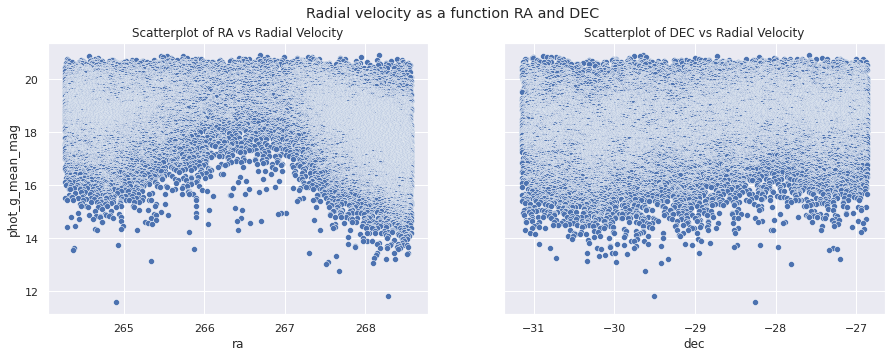

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Radial velocity as a function RA and DEC')

# RA Distribution
sns.scatterplot(data = df, ax=axes[0], x ="ra", y ="phot_g_mean_mag")
axes[0].set_title('Scatterplot of RA vs Radial Velocity')

# DEC Distribution
sns.scatterplot(data = df,ax=axes[1],x = "dec", y="phot_g_mean_mag")
axes[1].set_title('Scatterplot of DEC vs Radial Velocity')

The above plots of G-band mean magnitude vs RA and dec shows that there is no obvious trend being followed along ra and dec.The plots are just in correspondence with the respective distribution plots.  



# 2. Data Cleaning and Interpretation

You have been provided with a few FITS files of a Pulsar. The pulsars are extremely faint radio source, hence on earth, where there is so much of radio noise coming off from TV broadcasts etc. it becomes tough to detect them in a single observation.

Scientists use a method called stacking which helps them detect these pulsars given enough observations about them. Each FITS file consists of a pulsar reading, which is invisible to the human eye when plotted. But if you stack all the images and take the mean of each pixel to create a new one, the noise being a random gaussian distribution cancels out and the Radio pulsar stars to become visible.

Your task here is to-

- Create a Mean stack of all the FITS images and plot the final results. Also mention the pixel number of the Pulsar detection and also make a circle around it in the image while plotting (This is bit tricky part hence leave if no feasible).

- Create a Median stack and repeat the same process. 

- Comment your observations about what stacking is better, Median or Mean. 

- Also, if I increase the dataset images to about a million (real life scenario), do you think any problem would occur? Suggest a few ways to overcome such problems if any.


The data for this exercise is provided in the folder named `Pulsar Data`

In [ ]:
#Getting the fits files and storing them in a dictionary named "images".

import os
from astropy.io import fits

folder_path = '/content/gdrive/MyDrive/RG_Assignment/Pulsar Data'
fits_files = os.listdir(folder_path)

images = {}
for i, file_name in enumerate(fits_files):
    file_path = os.path.join(folder_path, file_name)
    with fits.open(file_path) as hdulist:
        image_data = hdulist[0].data
        images[f'image_{i}']=image_data

In [ ]:
# Defining function for mean

def mean_fits(filedict):
  n = len(filedict)
  if n>0:
    data = filedict["image_0"]
    for i in range(1,n):
      data = data+images["image_"+"{}".format(i)]
    
    mean = data/n
    return mean

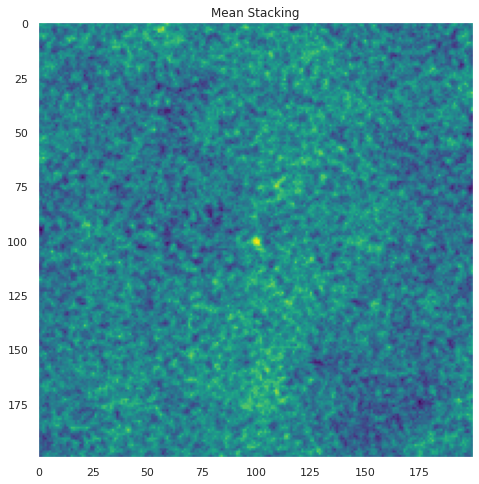

In [ ]:
mean = mean_fits(images)
plt.figure(figsize=(8,8))
plt.title("Mean Stacking")
plt.imshow(mean, cmap=plt.cm.viridis)
plt.grid(False)
#plt.axis('off')

In [ ]:
#Defining a function which takes corresponding elements of all the fits files, takes the median of all the values and stores it in the corresponding position of a new array.
def median_stack(filedict):
   image_list=[]
   for i in range(len(filedict)):
     image_list.append(filedict["image_"+"{}".format(i)])
   
   median_image = np.median(image_list,axis=0)
   return median_image    

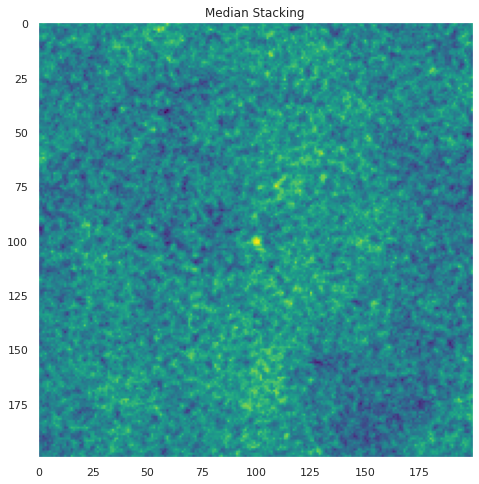

In [ ]:
median = median_stack(images)
plt.figure(figsize=(8,8))
plt.title("Median Stacking")
plt.imshow(median, cmap=plt.cm.viridis)
plt.grid(False)
#plt.axis('off')




*   We can see that the pulsar is located at pixel (100,100).



* I heavily used [Rushab Kumbhani's page](https://rushabhkumbhani.wordpress.com/2020/11/15/calculating-the-median-and-mean-stack-of-a-set-of-radio-astronomy-images/#:~:text=The%20undetected%20pulsars%20are%20located,new%20image%20from%20the%20result) for this task.


* Though I had to modify all the codes significantly as I stored my fits files in a dictionary, I got the idea on how to approach the process of median and mean stacking form the above website. 

* There doesn' difference in the quality image of the median stack and the mean stack. Also, the individual images appear to be better looking than the stack. The reason for this could be the small size of the sampled data. We will actually get a better image if we had a large dataset as stacking increases the signal to noise ratio.

* Coming to wich stack is better, I would like Rushab here as he has explained it well: "Median can be a more robust measure of the average trend of datasets than the mean, as the latter is easily skewed by outliers"

*  But using median stack comes with its own limitations as in median stack, the total memory used will climb up very quickly as the size dataset increases.Refer Rushab's page for a detailed explanation and a method to tackle this issue.














# 3. Data Interpretation

In [ ]:
#Required libraries here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.esa.jwst import Jwst


In [ ]:
# Data query code here
coord = SkyCoord(ra=61.2, dec=-60, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(216.9661, u.deg)
height = u.Quantity(120.55, u.deg)
result = Jwst.query_region(coordinate=coord, width=width, height=height, async_job=True)
 

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


I should say I'm surprised by length of the query has returned. I checked the STSCI's mast website and I found only 11k objects in the selected region that are observed by JWST. The number of objects are expected to be much lower than the length of the table because the name of each target is repeated multiple times observed with a different filter.Therefore this dataset contains the data of obects studied under multiple filters. 

In [ ]:
print("The dataset contains the JWST survey data around the region : 61.2 degrees RA \n-60 degrees DEC \n\n\n\n The info contained in the query is: ")
result.info

The dataset contains the JWST survey data around the region : 61.2 degrees RA 
-60 degrees DEC 



 The info contained in the query is: 


<Table length=593892>
         name           dtype 
---------------------- -------
                  dist float64
         observationid  object
      calibrationlevel   int32
                public    bool
       dataproducttype  object
       instrument_name  object
   energy_bandpassname  object
           target_name  object
             target_ra float64
            target_dec float64
position_bounds_center  object
 position_bounds_spoly  object

In [ ]:
#Converting the table we got into a pandas dataframe for easier handling.
dataframe = result.to_pandas()
dataframe.head()

,dist,observationid,calibrationlevel,public,dataproducttype,instrument_name,energy_bandpassname,target_name,target_ra,target_dec,position_bounds_center,position_bounds_spoly
0,2.106427,jw01189001001_08101_00003_nrs1,2,False,image,NIRSPEC,F290LP,UNKNOWN,57.030457,-60.376464,STC-S as Position ICRS GEOCENTER 57.0812248760...,Polygon 57.02857195099999 -60.37846949200012 5...
1,2.106427,jw01189001001_02101_00002_nrs1,2,False,image,NIRSPEC,CLEAR,UNKNOWN,57.030457,-60.376464,STC-S as Position ICRS GEOCENTER 57.0289357969...,Polygon 57.02760661499999 -60.37910797800024 5...
2,2.106427,jw01189001001_06101_00001_nrs2,2,False,image,NIRSPEC,F170LP,UNKNOWN,57.030457,-60.376464,STC-S as Position ICRS GEOCENTER 57.0284569405...,Polygon 57.02912401400002 -60.378873258000255 ...
3,2.106427,jw01189-o001_s00002_nirspec_f290lp-g395m-s200a1,3,False,image,NIRSPEC,F290LP,UNKNOWN,57.030457,-60.376464,STC-S as Position ICRS GEOCENTER 57.0932370264...,Polygon 57.034568528000015 -60.38292552099987 ...
4,2.106427,jw01189-o003_s00001_nirspec_clear-prism-s200a1...,3,False,image,NIRSPEC,CLEAR,UNKNOWN,57.030457,-60.376464,STC-S as Position ICRS GEOCENTER 57.0465029824...,Polygon 57.027829565000026 -60.37847817599999 ...


# Distribution of RA and DEC

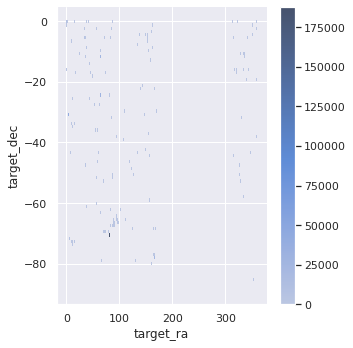

In [ ]:
#Bivariate distribution of RA and DEC 
sns.displot(dataframe, x="target_ra", y="target_dec",cbar=True )

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target_ra'>

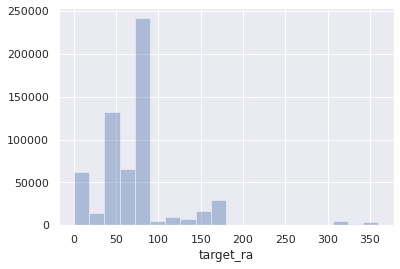

In [ ]:
#Distribution of RA
sns.distplot(dataframe['target_ra'],kde = False,bins = 20  )

The bivariate distribution shows that the objects are very spread out. The poins in the distribution are very faint and the data too less to make conclutions about the distribution.


As we can see in plot of individual distribuion of RA, a lot of the regions still haven't been surveyed.

# Scatterplot of RA vs Distance

<AxesSubplot:xlabel='target_ra', ylabel='dist'>

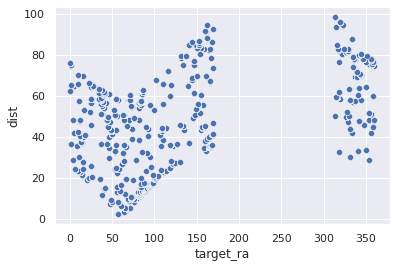

In [ ]:
#Scatterplot of RA vs distance
sns.set_theme()
sns.scatterplot(data = dataframe ,x = "target_ra", y="dist")

There is a peculiar trend that is being followed here, the range of distances of the objects at any particular RA are 40 kpc. Though the starting point and the endingpoint of the range is varying with RA, the length of the range(40 kpc) is remaining constant.
Also, there appears to be no observation made in the region of 175 degrees RA to 320 degrees.

It appears that the trend that is being followed is more due to the limited observations performed and less due to the actual distance distribution of objects.

This plot also confirms our assumption that the individual objects in the dataset are much less than the lenght of the table, as the plot clearly doesn't have half a million points.

# Scatterplot of DEC vs Distance

<AxesSubplot:xlabel='target_dec', ylabel='dist'>

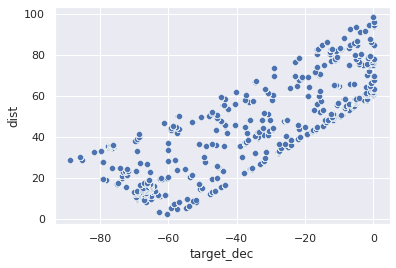

In [ ]:
sns.scatterplot(data = dataframe,x = "target_dec", y="dist")

Again, I highly suspect that the above plot is a result of incomplete survey.
Maybe the filters used have limited the wavelength of observation hencewe have limited data of distances at all the coordinates. There needs to be more survey done with all the filters at all coordinates to get a better picture.

# #Comparing the the GAIA and JWST data near Galactic center

Thought of comparing the GAIA's data of the galaxy center region that we saw in the 1st task with the JWST data. But, sadly JWST still didn't survey that region.

In [ ]:
coordinate = SkyCoord(ra=266.41683333, dec=-27, unit=(u.degree, u.degree), frame='icrs')
radius = u.Quantity(2.147585428298503,u.degree)
jwst_job = Jwst.query_region(coordinate, radius = radius,async_job= True, show_all_columns = True)
jwst_job.info

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


<Table length=4038>
            name              dtype  n_bad
---------------------------- ------- -----
                        dist float64     0
                      public    bool     0
              algorithm_name  object     0
            calibrationlevel   int32     0
                  collection  object     0
                   creatorid  object     0
             dataproducttype  object     0
         energy_bandpassname  object     0
               energy_bounds  object     0
         energy_bounds_lower float64   174
         energy_bounds_upper float64   174
         energy_bounds_width float64   174
            energy_dimension   int64  4038
          energy_energybands  object     0
       energy_freqsamplesize float64  4038
            energy_freqwidth float64   174
       energy_resolvingpower float64  4038
              energy_restwav float64  4038
           energy_samplesize float64  4038
   energy_transition_species  object     0
energy_transition_transition  obje

In [ ]:
 jwst_df = jwst_job.to_pandas()
 jwst_df.head()

,dist,public,algorithm_name,calibrationlevel,collection,creatorid,dataproducttype,energy_bandpassname,energy_bounds,energy_bounds_lower,...,time_bounds,time_bounds_lower,time_bounds_upper,time_bounds_width,time_dimension,time_exposure,time_resolution,time_samplesize,type,typecode
0,1.484857,False,exposure,-1,JWST,ivo://archive.stsci.edu/JWST?jw02092006002_xx1...,image,F2100W,Polygon 0.001059971920992023 -114.591559026164...,0.000018,...,,NaN,NaN,NaN,<NA>,41.626,NaN,NaN,,S
1,1.484857,False,exposure,-1,JWST,ivo://archive.stsci.edu/JWST?jw02092005001_xx1...,image,F162M_F150W2;F360M,Polygon 1.963526363913331E-4 -114.591559026164...,0.000003,...,,NaN,NaN,NaN,<NA>,96.631,NaN,NaN,,S
2,1.484857,False,exposure,-1,JWST,ivo://archive.stsci.edu/JWST?jw02092005001_xx1...,image,F162M_F150W2;F360M,Polygon 1.963526363913331E-4 -114.591559026164...,0.000003,...,,NaN,NaN,NaN,<NA>,96.631,NaN,NaN,,S
3,1.484857,False,exposure,-1,JWST,ivo://archive.stsci.edu/JWST?jw02092006001_xx1...,image,F2100W,Polygon 0.001059971920992023 -114.591559026164...,0.000018,...,,NaN,NaN,NaN,<NA>,41.626,NaN,NaN,,S
4,1.484857,False,exposure,-1,JWST,ivo://archive.stsci.edu/JWST?jw02092005001_xx1...,image,F210M;F480M,Polygon 1.1413319279005998E-4 -114.59155902616...,0.000002,...,,NaN,NaN,NaN,<NA>,96.631,NaN,NaN,,S


<AxesSubplot:xlabel='target_dec', ylabel='Count'>

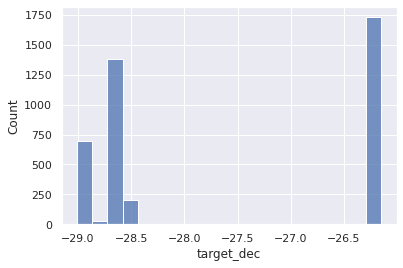

In [ ]:
sns.histplot(jwst_df['target_dec'],bins=20, kde =False)

<AxesSubplot:xlabel='target_ra', ylabel='Count'>

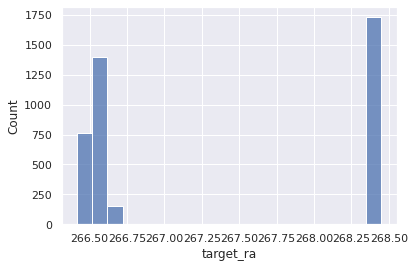

In [ ]:
sns.histplot(jwst_df['target_ra'],bins=20, kde =False)

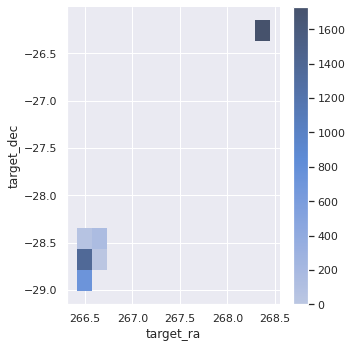

In [ ]:
sns.set_theme()
sns.displot(jwst_df, x="target_ra", y="target_dec",cbar=True )